# Problem Statement  

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house

### Business Goal 
 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##  Reading & Understanding Data

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics

C:\Users\harinika143078\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 200,'display.max_columns', 100)
# just to get more clear view of dataframes

In [3]:
df=pd.read_csv('train.csv')
# Reading the csv file

In [4]:
df.head()
# Checking few records of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape
# getting the shape of the dataset

(1460, 81)

In [6]:
df.describe()
# seeing the statistical distribution of data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The data seems to have lot of missing values, let's see how can we handle them

##  Data Cleaning

### Missing values 

In [8]:
# Getting sum of missing values in each column
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2)>0].sort_values(ascending=False)
# As the data has huge number of columns, we are just considering the columns which has missing values

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

    PoolQC has highest number of missing values which is 99%.We can see that the variable 'PoolArea' has value 0 for all the rows where PoolQC is null, This clearly says that those houses doesn't have pools.   
    We can impute them with 'NA'

In [10]:
df[df['PoolQC'].isnull()]['PoolArea'].sum()

0

In [11]:
df['PoolQC']=df['PoolQC'].fillna('NA')

     MiscFeature are something which are not covered in other categories, There can be houses with no Miscellaneous feature. So we can impute them with 'NA' as per data description
     
 
    

In [12]:
df[df['MiscFeature'].isnull()]['MiscVal'].sum()


0

In [13]:
df['MiscFeature']=df['MiscFeature'].fillna('NA')

    
    Similar case with Alley, Fence and FireplaceQu, Therefore we can impute them with 'NA'

In [14]:
for col in ['Alley','Fence','FireplaceQu']:
    df[col]=df[col].fillna('NA')

    Lot Frontage is the  measurement of the length of area facing the main road on to which the building fronts. So, the area of the Lot frontage would be approximately equal to the area of the Lot frontage of the other neighbourhood houses. 
    So we can impute the missing values with median based on the neighbourhood houses

In [15]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

    The variable related to Garage has same number of missing values and also Garage area is 0 for all those respective rows which implies that there might be no Garage available for those houses
    Hence we can impute all the categorical variables with 'NA'

In [16]:
df[df['GarageType'].isnull()]['GarageArea'].sum()

0

In [17]:
for col in ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']:
    df[col]=df[col].fillna('NA')

In [18]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2)>0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

We can create a variable namely AGE for the houses based on the year buit and year sold. The missing values in the GarageYrBlt is due to absence of Garage in those respective houses, we can only impute them with zeros and increase the value of other Year variables by 1 so that we will have a clear interpretation of null values with in the variable which is '0'.

In [19]:
df['RemodAdd_Age']=df['YrSold']-df['YearRemodAdd']+1
df['YearBuilt_Age']=df['YrSold']-df['YearBuilt']+1
df['GarageYrBlt_Age']=df['YrSold']-df['GarageYrBlt']+1

In [20]:
df['GarageYrBlt_Age']=df['GarageYrBlt_Age'].fillna(0)
# The null values are imputed with 0

In [21]:
df.drop(['Id','YearRemodAdd','YearBuilt','GarageYrBlt','YrSold'],axis=1,inplace=True)
# dropping the redundant columns

In [22]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2)>0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
dtype: float64

    Similarly MasVnrArea is Masonry veneer area in square feet, most of 'None' values have zero as Area, hence we can impute the missing values with 'None' and 0

In [23]:
df[df['MasVnrType']=='None']['MasVnrArea'].median()

0.0

In [24]:
df['MasVnrType']=df['MasVnrType'].fillna('None')

In [25]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [26]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2)>0]

BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
dtype: float64

    Same case with Basement related variables, Since all the basement related variables are categorical we can fill the missing values with NA

In [27]:
for col in [ 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('NA')



    There is only one record which is missing in Electrical variable and we can impute with the mode

In [28]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [29]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2)>0]

Series([], dtype: float64)

There are no missing columns left now.

### Assigning the appropriate data-types for each of the columns

In [30]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['MoSold']=df['MoSold'].astype('object')
# These variables might work better when changed to categorical variables since they are numerical but nominal in nature

There are many variables in the data, let's break down the variables into  Discrete, Continuos Numeric variables and Categorical Variables 

In [31]:
Numeric = df.select_dtypes(include=['float64', 'int64'])
Categorical = df.select_dtypes(include=['object'])

In [32]:
Numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,RemodAdd_Age,YearBuilt_Age,GarageYrBlt_Age
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,6,6,6.0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,32,32,32.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,8,8.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,37,92,9.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,9,9,9.0


In [33]:
Categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,2,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,5,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,9,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,2,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,12,WD,Normal


##### There are some categorical variables which are ordinal but can be converted to numeric data type and encoded accordingly

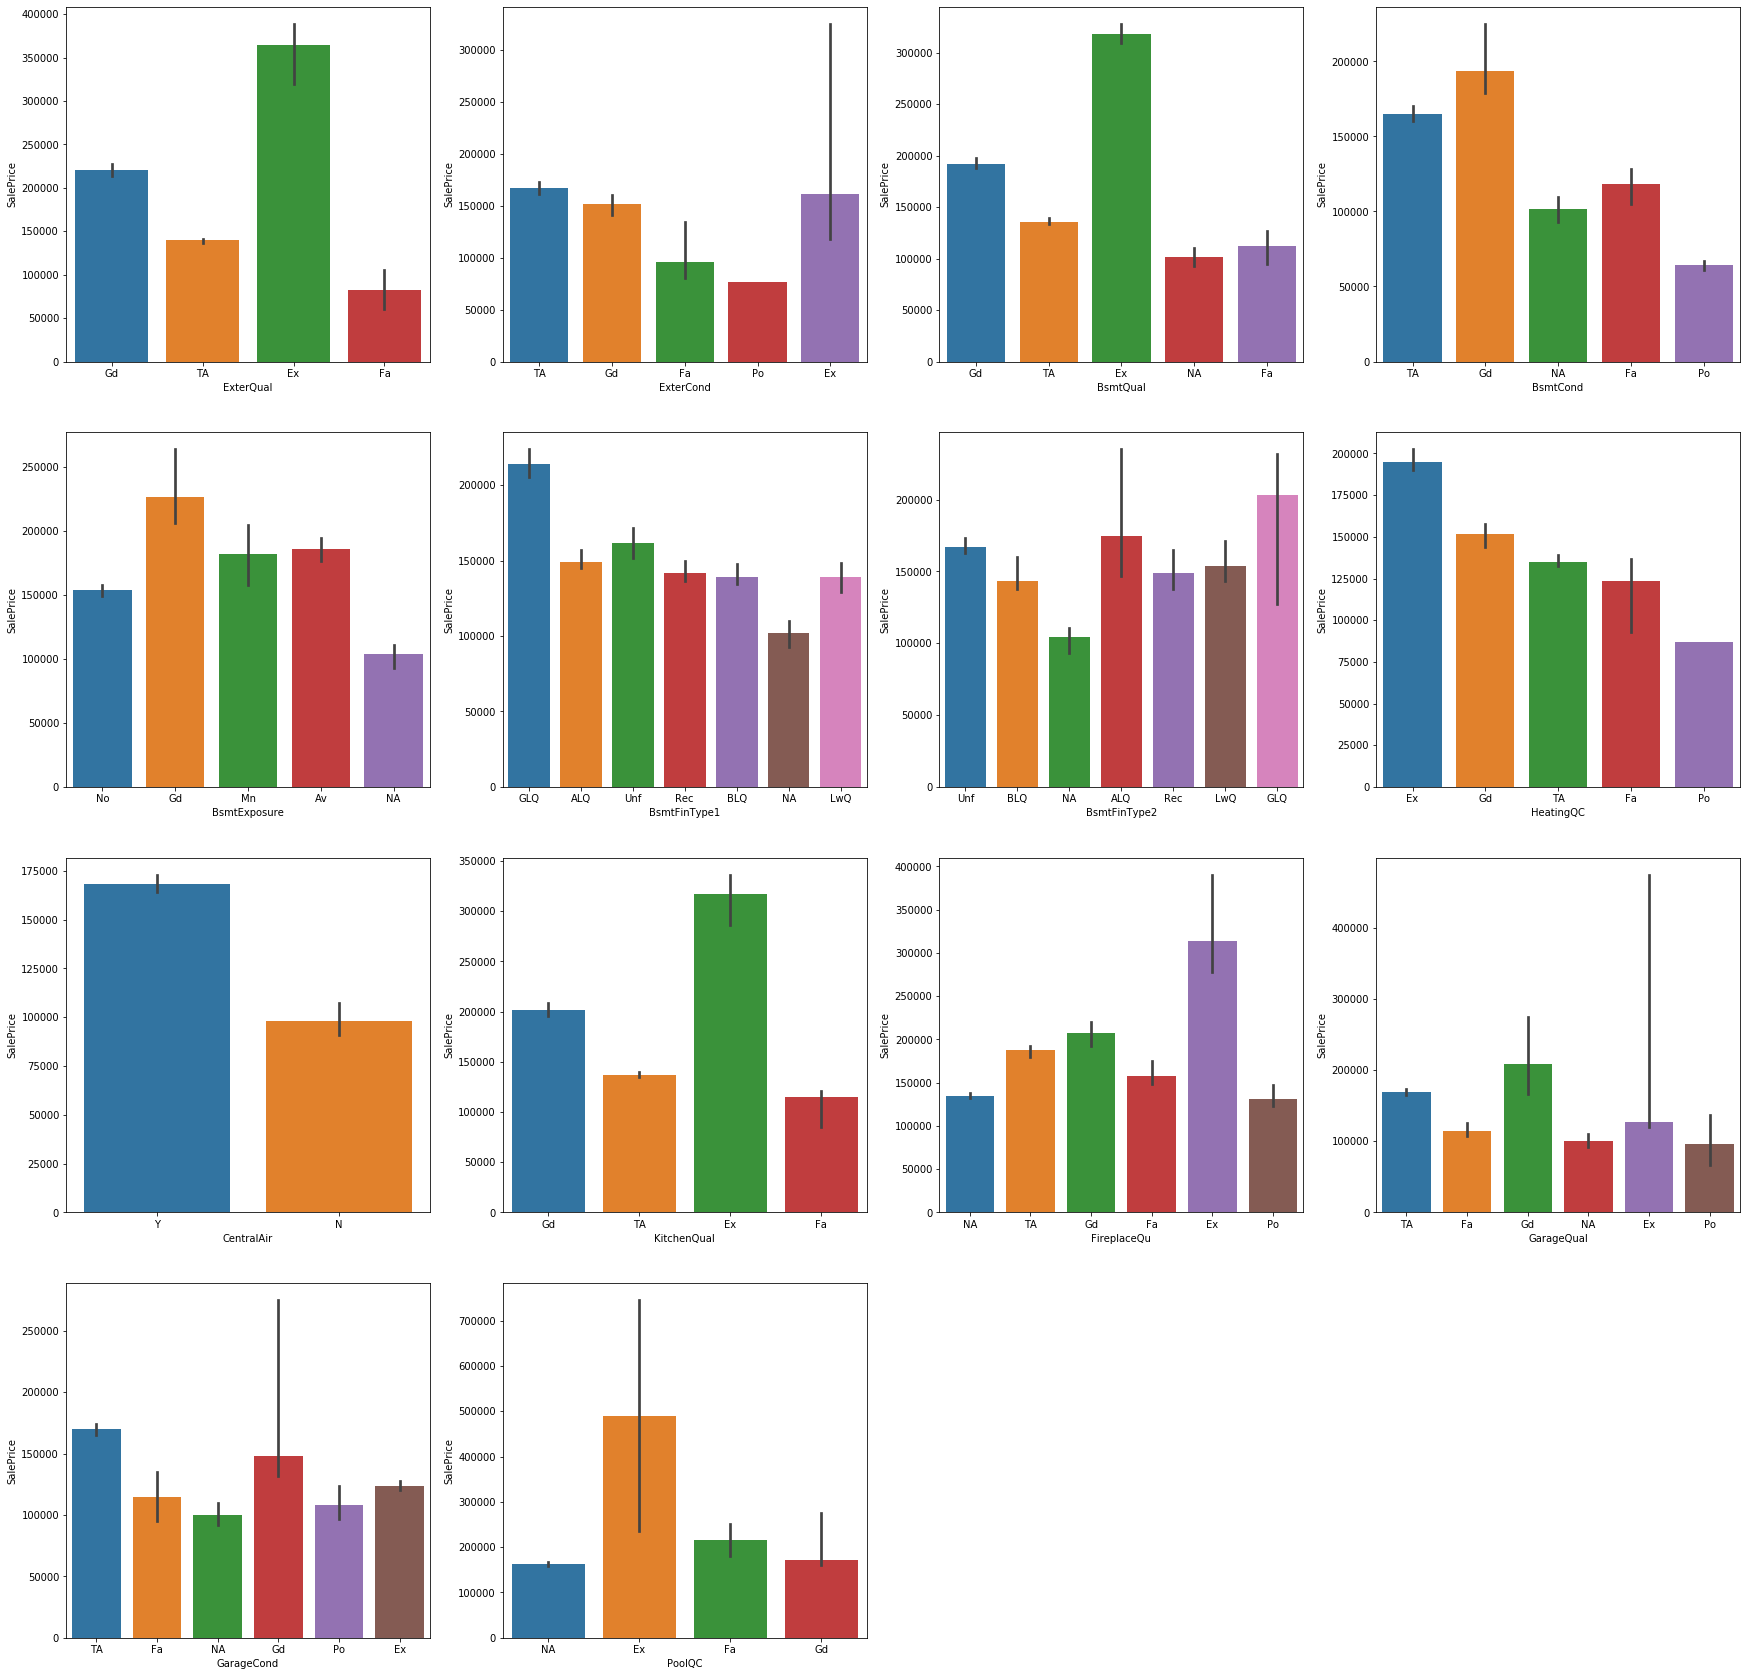

In [34]:
plt.figure(figsize=(30,30))
i=1
for col in ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
            'CentralAir','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']:
    plt.subplot(4,4,i)
    sns.barplot(x = col, y = 'SalePrice',data=df,estimator=np.median)
  # plt.title(col +' vs price')
  # plt.ylabel('Price')
    i=i+1

    From the above plots we can see a clear sense of ordinality in the variables with respect to the Sale Price  
    - Ex>GD>TA>Fa>Po>NA

In [35]:
df['ExterQual']=df['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['ExterCond']=df['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [36]:
df['BsmtQual']=df['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['BsmtCond']=df['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['BsmtExposure']=df['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
df['BsmtFinType1']=df['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df['BsmtFinType2']=df['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

In [37]:
df['HeatingQC']=df['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['CentralAir']=df['CentralAir'].replace({'N':0,'Y':1})
df['KitchenQual']=df['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['FireplaceQu']=df['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['GarageQual']=df['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['GarageCond']=df['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['PoolQC']=df['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})

In [38]:
# getting numerical and categorical columns
Numeric = df.select_dtypes(include=['float64', 'int64'])
Categorical = df.select_dtypes(include=['object'])

In [39]:
Numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'SalePrice', 'RemodAdd_Age', 'YearBuilt_Age',
       'GarageYrBlt_Age'],
      dtype='object')

In [40]:
# cont=[col for col in Numeric.columns if df[col].unique().shape[0]>=20 and col not in ['RemodAdd_Age', 'YearBuilt_Age','GarageYrBlt_Age','YrSold','MoSold']]
disc=[col for col in Numeric.columns if df[col].unique().shape[0]<20]
cont=[col for col in Numeric.columns if df[col].unique().shape[0]>=20]

In [41]:
cont
# Total continuos Variables

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice',
 'RemodAdd_Age',
 'YearBuilt_Age',
 'GarageYrBlt_Age']

In [42]:
disc
# Total Discrete variables

['OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'PoolQC']

In [43]:
Categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

    let's see how each category in each variable are distributed

In [44]:
round(100*(df['MiscFeature'].value_counts()/len(df['MiscFeature'].index)),2)

NA      96.30
Shed     3.36
Othr     0.14
Gar2     0.14
TenC     0.07
Name: MiscFeature, dtype: float64

The variable Miscfeature has 96% of a certain value which implies that it wouldn't help much in predicting the target variable.
So Let's see which variables has maximum number of constant values and remove them

In [45]:
for col in Categorical.columns:
    print('The max for ',col,'is',round(100*(df[col].value_counts()/len(df[col].index)),2).max(),'%')
    

The max for  MSSubClass is 36.71 %
The max for  MSZoning is 78.84 %
The max for  Street is 99.59 %
The max for  Alley is 93.77 %
The max for  LotShape is 63.36 %
The max for  LandContour is 89.79 %
The max for  Utilities is 99.93 %
The max for  LotConfig is 72.05 %
The max for  LandSlope is 94.66 %
The max for  Neighborhood is 15.41 %
The max for  Condition1 is 86.3 %
The max for  Condition2 is 98.97 %
The max for  BldgType is 83.56 %
The max for  HouseStyle is 49.73 %
The max for  RoofStyle is 78.15 %
The max for  RoofMatl is 98.22 %
The max for  Exterior1st is 35.27 %
The max for  Exterior2nd is 34.52 %
The max for  MasVnrType is 59.73 %
The max for  Foundation is 44.32 %
The max for  Heating is 97.81 %
The max for  Electrical is 91.44 %
The max for  Functional is 93.15 %
The max for  GarageType is 59.59 %
The max for  GarageFinish is 41.44 %
The max for  PavedDrive is 91.78 %
The max for  Fence is 80.75 %
The max for  MiscFeature is 96.3 %
The max for  MoSold is 17.33 %
The max for 

In [46]:
for col in Categorical.columns:
    if (((df[col].value_counts()/len(df[col].index)).max()) )>0.96:
        df.drop([col],axis=1,inplace=True)
# removing variables which has more than 96% os same values

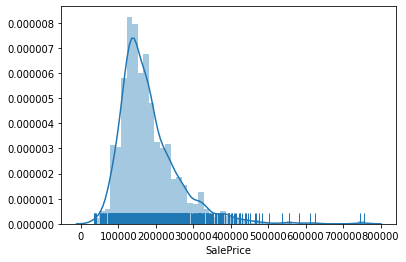

In [47]:
sns.distplot(df['SalePrice'],rug=True)
# Let's see how the target variable is distributed

The target variable seems to be positively skewed, let's see if log transformation could reduce the skew

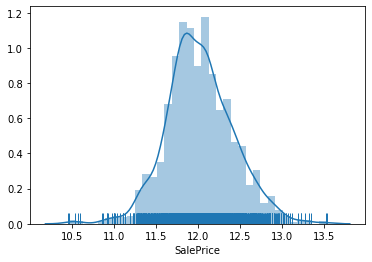

In [48]:
sns.distplot(np.log1p(df['SalePrice']),rug=True)
# 

After transformation, Sale price variable looks to have normal distribution

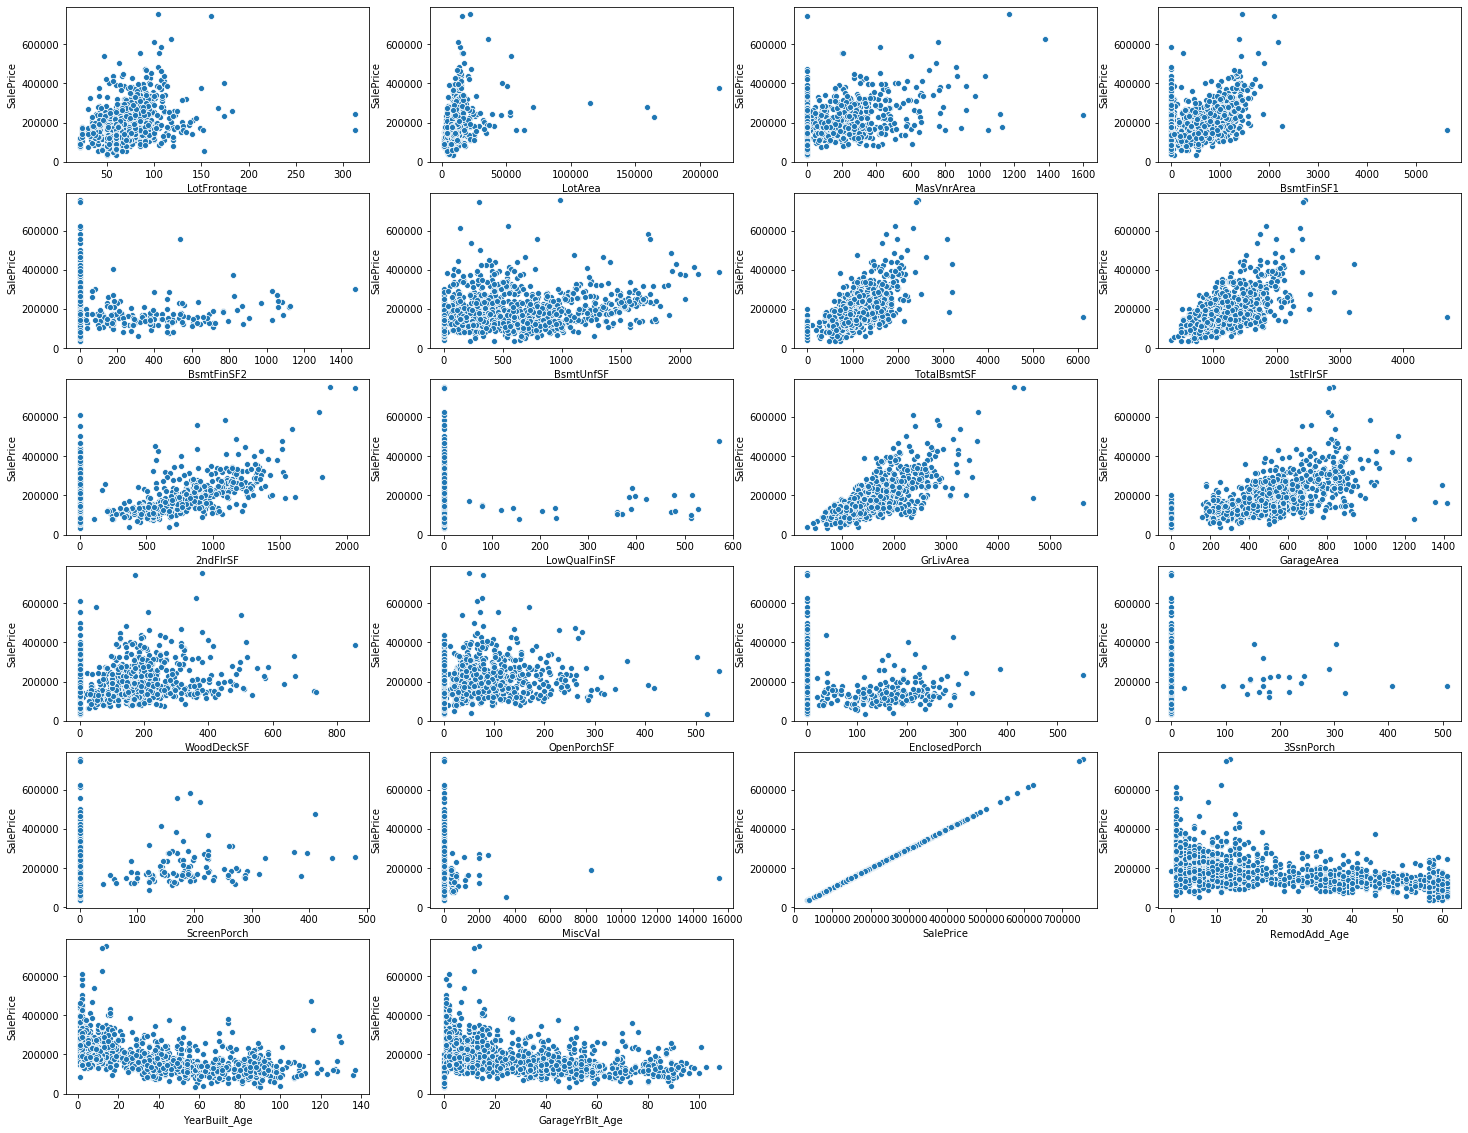

In [49]:
# Let's see how all continuous variables are distributed with respect to Sale Price
plt.figure(figsize=(25,20))

i=1
for col in cont:
    plt.subplot(6,4,i)
    sns.scatterplot(df[col],df['SalePrice'])
    i=i+1
# double click for better view

There are some variables which show strong relationship with SalePrice Variable- LotArea, BsmtFinSF1, TotalBsmntSF, 1stFlrSF, 2ndFlrSF,GrLivArea,GarageArea

Most of the continuous variables seems to be skewed and consist of outliers which need to be treated accordingly

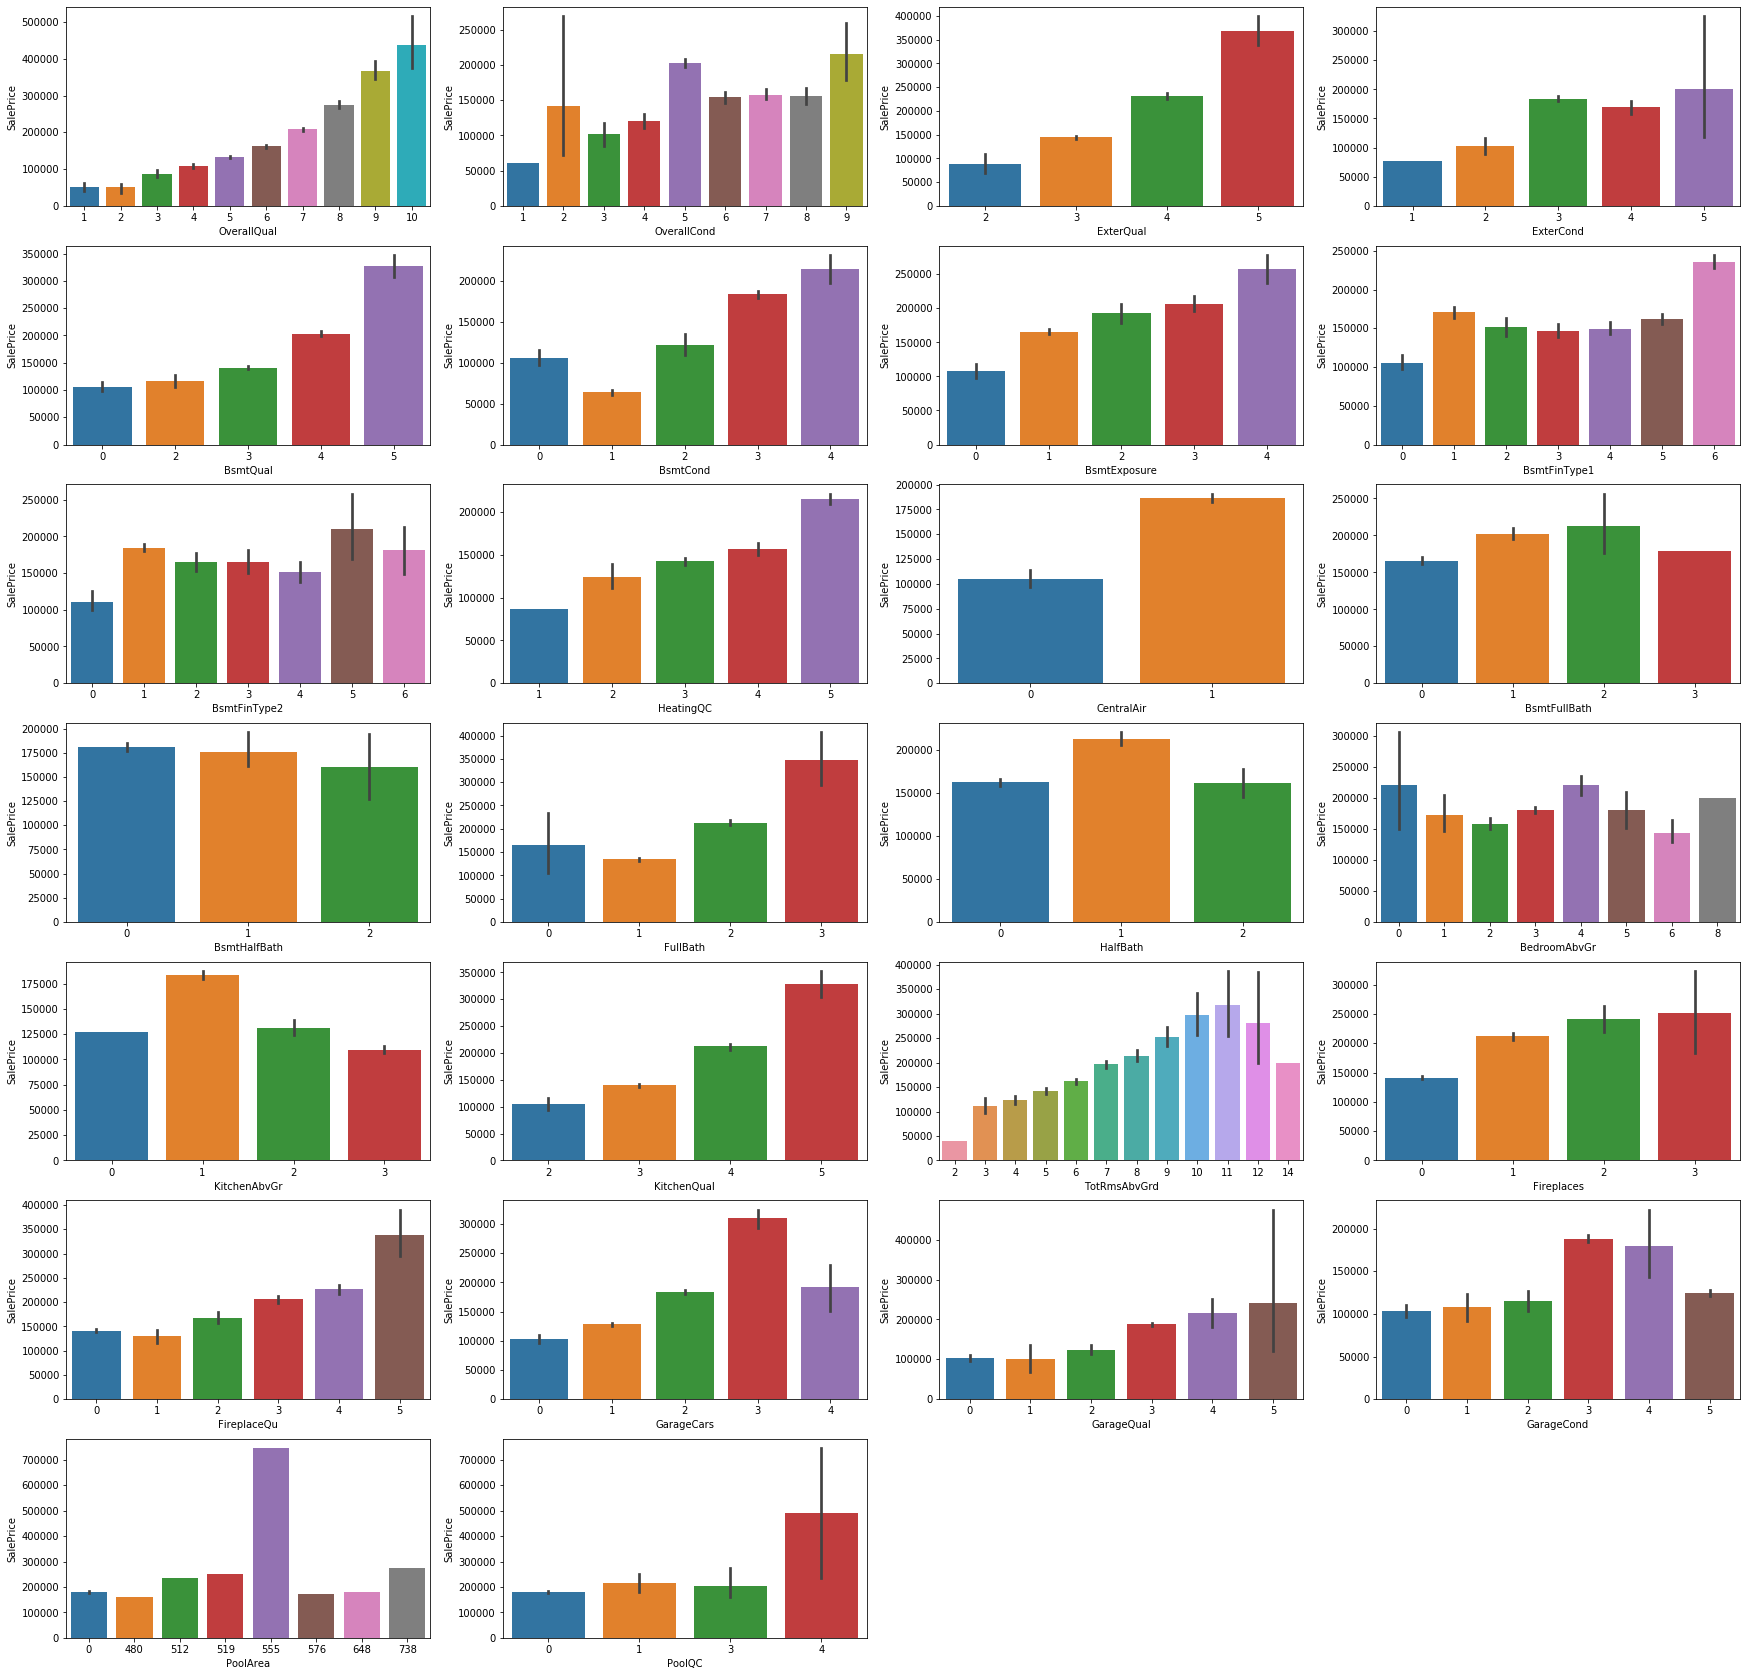

In [50]:
plt.figure(figsize=(30,30))
i=1
for col in disc:
    plt.subplot(7,4,i)
    sns.barplot(x = col, y = 'SalePrice',data=df)
    i=i+1


# double click for better view

    There are many variables which shows linear relationship with SalePrice.  
    OverallQual,OverallCond,BsmtQual,HeatingQC,KitchenQual,TotalRmsAbvGrd,Fireplaces,ExterQual,Extercond,
    FireplaceQu,GarageQual

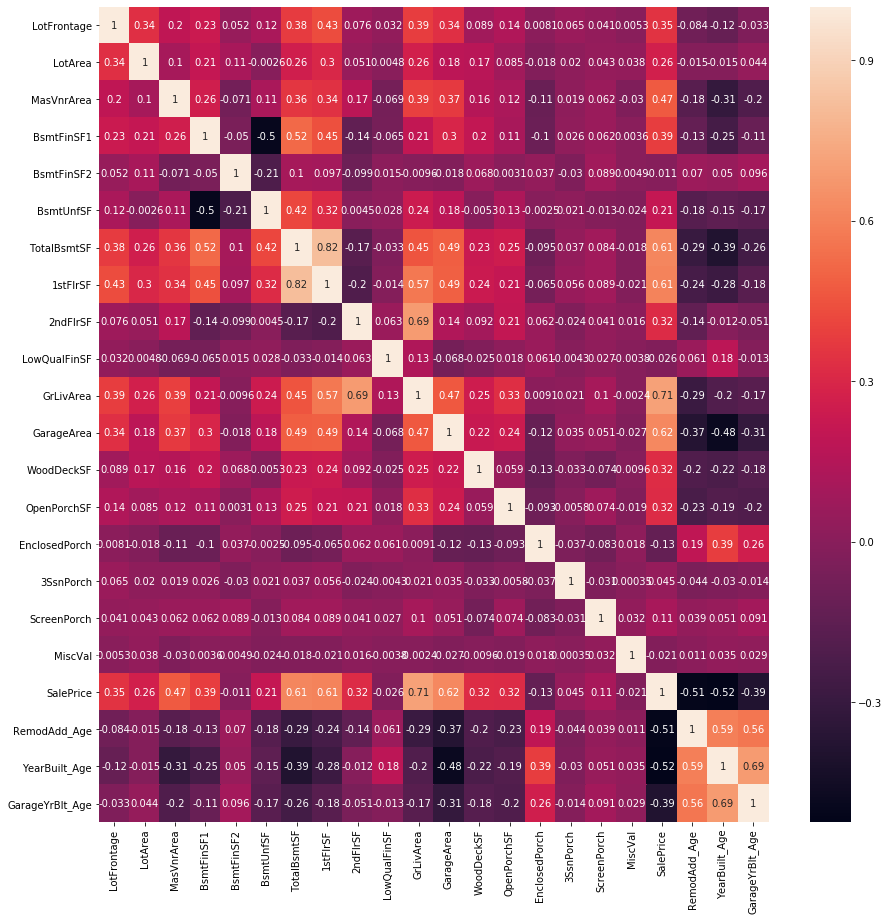

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df[cont].corr(),annot=True)
# plottin heatmap to check the correlation between variables to get some additional insight regarding them

In [52]:
Categorical = df.select_dtypes(include=['object'])
Categorical.columns.shape
# There are 25 categorical variables in the data

(25,)

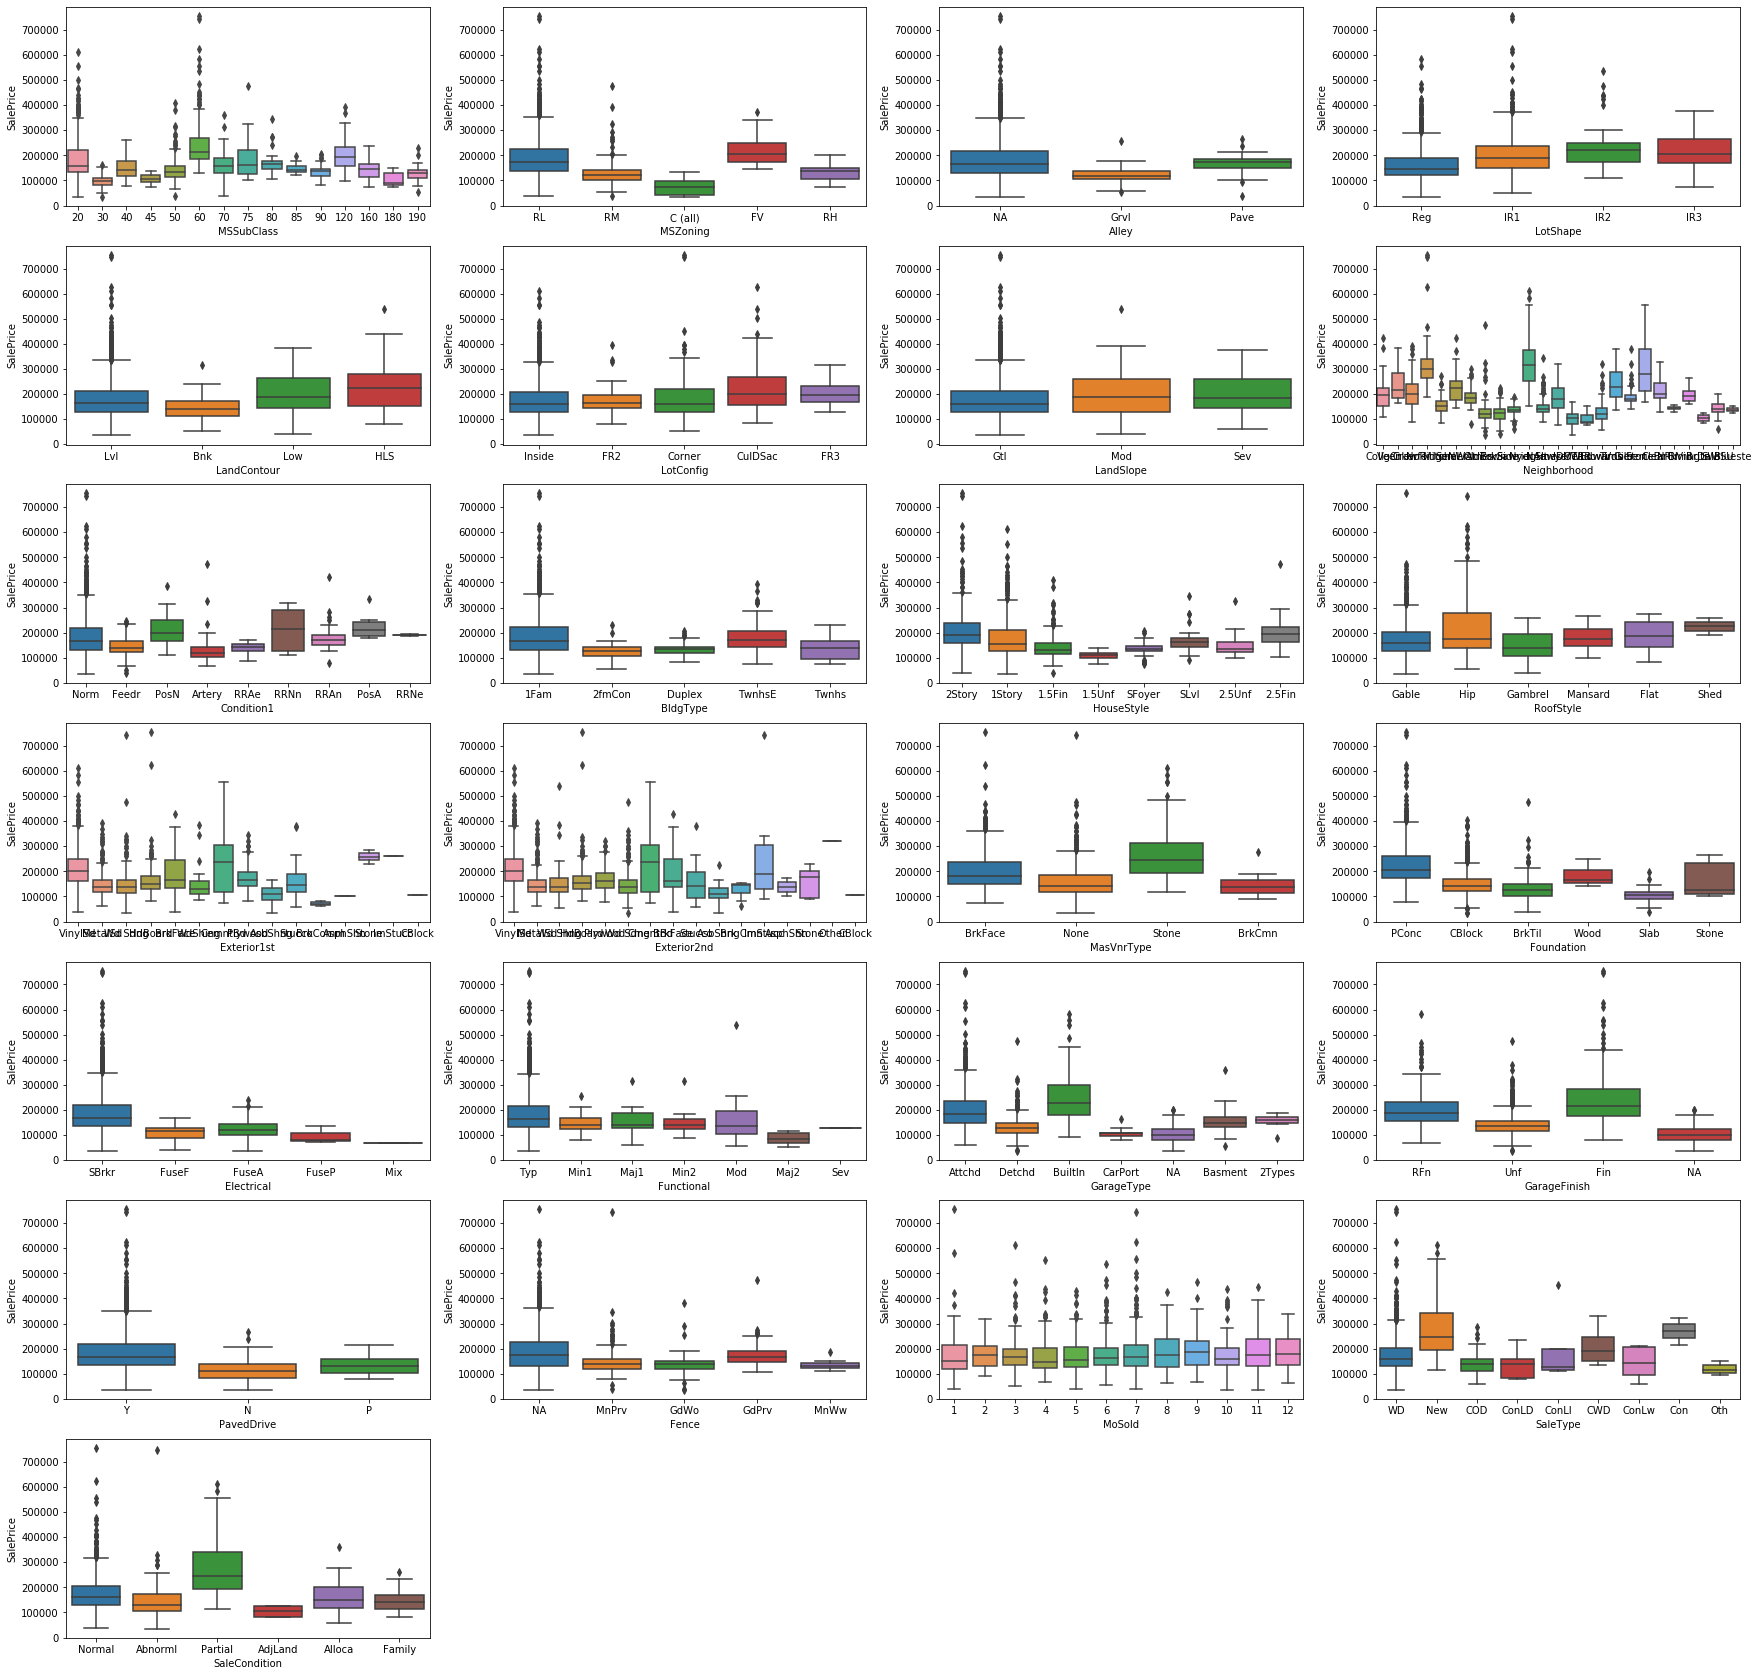

In [53]:
plt.figure(figsize=(30,30))
i=1
for col in Categorical:
    plt.subplot(7,4,i)
    sns.boxplot(x = col, y = 'SalePrice',data=df)
    i=i+1
# double click for better view

MsZoning, Lotshape,MasVnrType,Neighbourhood,Exterior1st,Functional, Foundation could be useful in predicting the target variable to the data

### Outlier Analysis

In [54]:
# Considering lower quantile as 0.25 and upper quantile as 0.99
def drop_outliers(x):
    list = []
    for col in cont:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df2 = drop_outliers(df)

In [55]:
df2.shape
# 15 variables which are severely affected by outliers are removed

(1445, 73)

#### As mentioned before most of the continuous variables are skewed So let's check skew for all the continuos variables. 

In [56]:
numeric_feats = cont # Taking only continuous variables

skewed_feats = df2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(60)


Skew in numerical features: 



,Skew
3SsnPorch,9.546148
LowQualFinSF,8.954026
MiscVal,7.760042
BsmtFinSF2,4.298837
ScreenPorch,4.069851
LotArea,3.954347
EnclosedPorch,3.078014
MasVnrArea,2.697003
OpenPorchSF,2.362031
SalePrice,1.905150


In [57]:
skewness.index

Index(['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtFinSF2', 'ScreenPorch',
       'LotArea', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'SalePrice',
       'WoodDeckSF', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', '2ndFlrSF',
       'BsmtFinSF1', 'GarageYrBlt_Age', 'LotFrontage', 'YearBuilt_Age',
       'TotalBsmtSF', 'RemodAdd_Age', 'GarageArea'],
      dtype='object')

##### It is said that variables having Skewness between -0.5 and +0.5 are having approximately symmetric distribution, Hence considering 0.5 as threshold value 
` let's try to remove skewness of the variables whose value is more than 0.5 by applying Box Cox Transformation`

In [58]:
cont2=['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtFinSF2', 'ScreenPorch',
       'LotArea', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'SalePrice',
       'WoodDeckSF', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtFinSF1', 'GarageYrBlt_Age', 'LotFrontage',
       'YearBuilt_Age', 'TotalBsmtSF']
# variables having skew value more than 0.5

In [59]:
# Note that setting λ=0 is equivalent to log1p which is used in the above plot to check the target variable.
# Also the Lambda value indicates the power to which all data should be raised, hence considering : 0.15
df3=df2.copy()
print("There are {} skewed numerical features to transform".format(len(cont2)))

from scipy.special import boxcox1p
skewed_features = cont2
lambda_ = 0.15
for feat in skewed_features:
    df3[feat] = boxcox1p(df2[feat], lambda_)
    


There are 20 skewed numerical features to transform


In [60]:
Numeric.columns
# Getting the final Numeric columns in the data

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'SalePrice', 'RemodAdd_Age', 'YearBuilt_Age',
       'GarageYrBlt_Age'],
      dtype='object')

In [61]:
Categorical.columns
# Getting Final Categorical columns in the data

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

###  Creating Dummy Variables for the Categorical features

In [62]:
df4=df3.copy()
for col in Categorical.columns:
    status = pd.get_dummies(df4[col],drop_first=True,prefix=col)
    df4 = pd.concat([df4, status], axis = 1)
    df4.drop([col], axis = 1, inplace = True)

In [63]:
df4.shape

(1445, 214)


##  Splitting the Data into Training and Testing Sets


In [64]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
# the the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df4, train_size = 0.70, test_size = 0.30, random_state = 45)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [66]:
num_vars=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'SalePrice', 'RemodAdd_Age', 'YearBuilt_Age',
       'GarageYrBlt_Age']
# Scaling all the numerical variables except dummy variables since they are already in the range of 0 to 1

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\harinika143078\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harinika143078\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
y_train=df_train['SalePrice']
X_train=df_train.drop(['SalePrice'],axis=1)

In [68]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,RemodAdd_Age,YearBuilt_Age,GarageYrBlt_Age,MSSubClass_30,MSSubClass_40,...,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,...,1011.000000,1011.000000,1011.000000,1011.0,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.0000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,0.493725,0.452789,0.510633,0.516038,0.234906,0.464227,0.520524,0.700297,0.738131,0.402819,0.583581,0.486683,0.210353,0.080098,0.645221,0.760123,0.718101,0.936696,0.427586,0.338585,0.013623,0.466891,0.136499,0.032641,0.519618,0.185955,0.357072,0.347840,0.502143,0.315619,0.199472,0.364985,0.437191,0.337426,0.563403,0.564194,0.323792,0.312375,0.090313,0.010255,0.063474,0.004060,0.003709,0.019953,0.454104,0.379591,0.537001,0.539958,0.044510,0.002967,...,0.001978,0.017804,0.000989,0.0,0.919881,0.002967,0.019782,0.027695,0.011869,0.000989,0.927794,0.588526,0.013848,0.065282,0.003956,0.272008,0.054402,0.054402,0.283877,0.419387,0.017804,0.926805,0.037587,0.107814,0.006924,0.811078,0.033630,0.068249,0.101879,0.136499,0.175074,0.164194,0.074184,0.051434,0.063304,0.051434,0.0455,0.002967,0.000989,0.007913,0.003956,0.003956,0.081108,0.002967,0.865480,0.002967,0.008902,0.015826,0.820969,0.083086
std,0.147216,0.123601,0.172735,0.158800,0.303493,0.186776,0.086954,0.168717,0.128712,0.263054,0.349239,0.360195,0.152675,0.227799,0.229485,0.129406,0.313946,0.243629,0.155131,0.396331,0.108782,0.141579,0.171215,0.127516,0.185043,0.247843,0.103033,0.072732,0.219688,0.145689,0.210546,0.365655,0.183844,0.150238,0.143389,0.142481,0.338668,0.295924,0.236965,0.091188,0.212627,0.058108,0.056055,0.126324,0.128665,0.343512,0.277939,0.274329,0.206328,0.054420,...,0.044455,0.132304,0.031450,0.0,0.271611,0.054420,0.139321,0.164180,0.108352,0.031450,0.258956,0.492344,0.116916,0.247145,0.062807,0.445214,0.226921,0

In [69]:
df_test[num_vars] = scaler.transform(df_test[num_vars])


C:\Users\harinika143078\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\harinika143078\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [70]:
y_test=df_test['SalePrice']
X_test=df_test.drop(['SalePrice'],axis=1)

    There are nearly 200 columns and it might be not recommended to apply lasoo or Ridge directly . As RFE is an efficient approach for eliminating features from a training dataset, we will try to use RFE to reduce the variables from 200 to 70 and then we can see how powerful Ridge and Lasso are to deal with the data.


In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE for 70 variables
rfe = rfe.fit(X_train, y_train)

In [72]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'GarageCars',
       'GarageQual', 'GarageCond', 'PoolQC', 'YearBuilt_Age', 'MSSubClass_45',
       'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_

In [73]:
X_train=X_train[col]
X_test=X_test[col]
# Including only RFE selected variables

## Model Building and Analysis

Let's perform Ridge and Lasso regression and analyse which would be recommended to apply to the data

### Ridge Regression


In [74]:
# using GridSearch for hyperparameter tuning

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.005,0.008,0.009,0.01,0.05,0.1,1,2,3,4,5,6]}


model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.008, 0.009, 0.01,
                                   0.05, 0.1, 1, 2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003184,1.451283e-03,0.000998,5.519789e-07,0.0001,{'alpha': 0.0001},0.920390,0.920974,0.896307,0.895760,0.890357,0.904773,0.013171,9,0.923458,0.923521,0.927237,0.930098,0.928777,0.926618,0.002711
1,0.002195,3.993989e-04,0.000599,4.890060e-04,0.001,{'alpha': 0.001},0.920397,0.921014,0.896317,0.895767,0.890351,0.904785,0.013182,8,0.923458,0.923521,0.927237,0.930098,0.928777,0.926618,0.002711
2,0.001995,4.264961e-07,0.000798,3.992083e-04,0.005,{'alpha': 0.005},0.920426,0.921192,0.896363,0.895796,0.890327,0.904836,0.013228,7,0.923457,0.923520,0.927237,0.930098,0.928777,0.926618,0.002711
3,0.002394,4.890063e-04,0.001197,3.994728e-04,0.008,{'alpha': 0.008},0.920447,0.921322,0.896397,0.895818,0.890309,0.904874,0.013262,6,0.923456,0.923519,0.927236,0.930097,0.928777,0.926617,0.002711
4,0.002992,3.504023e-07,0.000798,3.988509e-04,0.009,{'alpha': 0.009},0.920454,0.921365,0.896408,0.895825,0.890303,0.904886,0.013273,5,0.923456,0.923519,0.927236,0.930097,0.928776,0.926617,0.002711
5,0.002993,8.662177e-07,0.000997,1.784161e-07,0.01,{'alpha': 0.01},0.920461,0.921408,0.896420,0.895832,0.890297,0.904899,0.013284,4,0.923456,0.923519,0.927236,0.930096,0.928776,0.926617,0.002711
6,0.002992,5.917394e-07,0.001197,3.987313e-04,0.05,{'alpha': 0.05},0.920701,0.922931,0.896842,0.896076,0.890066,0.905338,0.013689,3,0.923418,0.923474,0.927206,0.930055,0.928749,0.926580,0.002714
7,0.003191,3.990893e-04,0.000998,1.070497e-06,0.1,{'alpha': 0.1},0.920912,0.924446,0.897307,0.896290,0.889798,0.905766,0.014105,2,0.923314,0.923354,0.927124,0.929942,0.928676,0.926482,0.002721
8,0.002992,5.091228e-07,0.001994,1.027139e-06,1,{'alpha': 1},0.918852,0.931667,0.900393,0.893980,0.886413,0.906273,0.016629,1,0.918825,0.918439,0.923067,0.925246,0.925282,0.922172,0.003002
9,0.002999,6.415036e-04,0.001198,3.986158e-04,2,{'alpha': 2},0.914357,0.930680,0.899682,0.889148,0.883730,0.903530,0.017130,10,0.913904,0.913252,0.918092,0.920315,0.921187,0.917350,0.003247


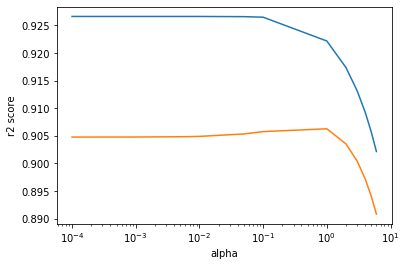

In [76]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [77]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1}
0.9062733611228224


#### Considering Hyperparameter alpha = 1

In [78]:
# The best hyperparameter is 1 
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9216028675084645
0.8937331142730892


In [79]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)


0.0012965642874914617
0.0018767300625831436


In [80]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
Ridge_data=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
Ridge_data['Coefficient']=abs(Ridge_data['Coefficient'])
Ridge_data[Ridge_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(15)


,Variable,Coefficient
8,GrLivArea,0.319
2,OverallQual,0.149
1,LotArea,0.125
3,OverallCond,0.104
7,TotalBsmtSF,0.095
17,YearBuilt_Age,0.093
34,Exterior1st_BrkComm,0.088
20,MSZoning_FV,0.083
66,Functional_Sev,0.076
22,MSZoning_RL,0.074


In [81]:
Ridge_data[Ridge_data['Coefficient']>0].shape
# there are total 67  variables along with the constant

(68, 2)

#### Considering Hyperparameter alpha = 2

In [82]:
 
lm2 = Ridge(alpha=2)
lm2.fit(X_train, y_train)

# predict
y_train_pred = lm2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9176364698935544
0.8942301457230033


In [83]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)


0.0013621622160641571
0.0018679522212290613


In [84]:
model_parameters = list(lm2.coef_)
model_parameters.insert(0, lm2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
Ridge_data=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
Ridge_data['Coefficient']=abs(Ridge_data['Coefficient'])
Ridge_data[Ridge_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(15)


,Variable,Coefficient
8,GrLivArea,0.289
2,OverallQual,0.156
1,LotArea,0.119
3,OverallCond,0.096
17,YearBuilt_Age,0.088
7,TotalBsmtSF,0.082
13,GarageCars,0.077
20,MSZoning_FV,0.065
22,MSZoning_RL,0.058
34,Exterior1st_BrkComm,0.057


In [85]:
Ridge_data[Ridge_data['Coefficient']>0].shape
# total 67 along with the constant

(68, 2)

     -  we can see that Ridge performed well on the train and test data and shrinks all regression coefficients towards zero but not totally zero, which induces some complexity in the model
     -  Even after choosing the double value of alpha the accuracies doesn't affected much and also the total number of variables remained same 

### Lasso Regression

In [86]:
# using GridSearch for hyperparameter tuning

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.005,0.01,0.05,0.09,0.1]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.09,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004987,0.000631,0.000998,8.341244e-07,0.0001,{'alpha': 0.0001},0.918098,0.930964,0.901372,0.894342,0.884168,0.905801,0.016749,1,0.916528,0.916182,0.921666,0.922800,0.921989,0.919833,0.002866
1,0.003790,0.000747,0.001197,3.987317e-04,0.001,{'alpha': 0.001},0.887940,0.911195,0.884900,0.865269,0.859737,0.881814,0.018275,2,0.882776,0.883358,0.885027,0.889685,0.893447,0.886859,0.004091
2,0.003989,0.000631,0.000999,4.847349e-06,0.005,{'alpha': 0.005},0.749173,0.801196,0.761254,0.752820,0.755984,0.764071,0.018971,3,0.761439,0.771083,0.763590,0.776625,0.771930,0.768933,0.005612
3,0.002394,0.000489,0.000997,6.143617e-07,0.01,{'alpha': 0.01},0.467232,0.532024,0.488496,0.505916,0.505046,0.499711,0.021423,4,0.502653,0.522229,0.489988,0.511603,0.511738,0.507642,0.010787
4,0.002593,0.000488,0.000998,7.776979e-07,0.05,{'alpha': 0.05},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002593,0.000489,0.000598,4.886166e-04,0.09,{'alpha': 0.09},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.002194,0.000399,0.001197,3.986359e-04,0.1,{'alpha': 0.1},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


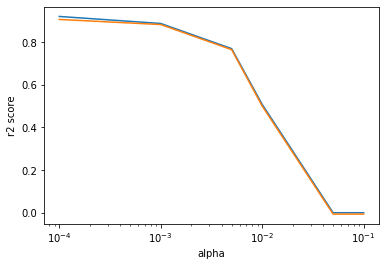

In [88]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [89]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.9058009555035427


#### Considering the Hyperparameter alpha = 0.0001

In [90]:
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9179625420571809
0.8920170473797151


In [91]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)

0.001356769499403904
0.0019070367221428787


In [92]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Lasso_data=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
Lasso_data['Coefficient']=abs(Lasso_data['Coefficient'])
Lasso_data[Lasso_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(20)


,Variable,Coefficient
8,GrLivArea,0.346
2,OverallQual,0.153
1,LotArea,0.123
3,OverallCond,0.109
17,YearBuilt_Age,0.102
34,Exterior1st_BrkComm,0.077
7,TotalBsmtSF,0.075
13,GarageCars,0.063
20,MSZoning_FV,0.058
66,Functional_Sev,0.054


In [93]:
Lasso_data[Lasso_data['Coefficient']>0].shape
# There are total 41 inclusing 40 variables and a constant
# The model managed to retain 40 variables out of 70 variables given

(41, 2)

#### Considering the Hyperparameter alpha = 0.0002

In [94]:
lm2 = Lasso(alpha=0.0002)
lm2.fit(X_train, y_train)

# predict
y_train_pred = lm2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9095120720726393
0.8907333598871806


In [95]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)

0.0014965268763163593
0.001929707330128817


In [96]:
model_parameters = list(lm2.coef_)
model_parameters.insert(0, lm2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Lasso_data=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
Lasso_data['Coefficient']=abs(Lasso_data['Coefficient'])
Lasso_data[Lasso_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(20)


,Variable,Coefficient
8,GrLivArea,0.328
2,OverallQual,0.166
1,LotArea,0.114
3,OverallCond,0.103
17,YearBuilt_Age,0.101
13,GarageCars,0.068
12,KitchenQual,0.045
27,Neighborhood_NoRidge,0.043
29,Neighborhood_StoneBr,0.043
7,TotalBsmtSF,0.038


In [97]:
Lasso_data[Lasso_data['Coefficient']>0].shape
# The model managed to retain 26 variables

(27, 2)

    -  Even Lasso performed well with train and test data similar to Ridge model.We can see that Lasso regression not only done the shrinkage of coefficients but also reduced the number of features in the model and lead to a sparsed solution
    -  With double value of alpha the accuracy remained same but the Non-Zero Coefficients heavily decreased which implied the sparse property of Lasso Regression.
    

##### Let's take top 20 variables from the Lasso model and build the model again as it is recommended to have as many as less variables and get a simple model with good accuracy

In [98]:
a=Lasso_data[Lasso_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(21)
# taking the top 20 variables along with constant

In [99]:
list_=a['Variable'].tolist()
# getting the variables into a list
list_.remove('constant')
# removing the constant as it doesn't considered as variable itself

In [100]:
X_train2=X_train[list_]
X_test2=X_test[list_]
# Considering only those top 20 variables

In [101]:
X_train2.head()

,GrLivArea,OverallQual,LotArea,OverallCond,YearBuilt_Age,GarageCars,KitchenQual,Neighborhood_NoRidge,Neighborhood_StoneBr,TotalBsmtSF,BsmtFinSF1,Neighborhood_Crawfor,Neighborhood_NridgHt,Exterior1st_BrkFace,BsmtFullBath,BsmtExposure,MSZoning_RL,MSZoning_FV,MSSubClass_90,HouseStyle_1.5Unf
809,0.643445,0.375,0.422951,0.428571,0.952943,0.50,0.333333,0,0,0.743071,0.000000,0,0,0,0.000000,0.25,0,0,0,0
160,0.402082,0.500,0.508760,0.571429,0.537768,0.50,0.333333,0,0,0.810067,0.767013,0,0,0,0.000000,0.25,1,0,0,0
424,0.389656,0.500,0.451031,0.428571,0.732870,0.25,0.333333,0,0,0.804592,0.754346,0,0,0,0.333333,0.25,1,0,0,0
48,0.471940,0.250,0.271822,0.428571,0.885864,0.00,0.333333,0,0,0.718354,0.000000,0,0,0,0.000000,0.25,0,0,0,0
906,0.523764,0.750,0.563349,0.428571,0.071866,0.75,0.666667,0,0,0.862142,0.402918,0,0,0,0.333333,0.25,1,0,0,0


In [102]:
# using GridSearch for hyperparameter tuning

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.005,0.01,0.05,0.09,0.1]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train2, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.09,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002184,0.000407,0.000790,0.000395,0.0001,{'alpha': 0.0001},0.916905,0.929996,0.909094,0.894238,0.882573,0.906571,0.016668,1,0.907059,0.905626,0.909569,0.912547,0.915989,0.910158,0.003747
1,0.001982,0.000008,0.000602,0.000491,0.001,{'alpha': 0.001},0.887436,0.910367,0.888750,0.865440,0.860949,0.882593,0.017855,2,0.882391,0.882960,0.883660,0.888799,0.893146,0.886191,0.004158
2,0.001974,0.000019,0.000592,0.000484,0.005,{'alpha': 0.005},0.749170,0.801192,0.762980,0.752843,0.756503,0.764522,0.018883,3,0.761438,0.771077,0.763341,0.776589,0.771646,0.768818,0.005620
3,0.001786,0.000394,0.000592,0.000483,0.01,{'alpha': 0.01},0.467238,0.532024,0.491021,0.505920,0.505050,0.500218,0.021180,4,0.502658,0.522231,0.489845,0.511607,0.511746,0.507617,0.010835
4,0.001795,0.000399,0.000798,0.000399,0.05,{'alpha': 0.05},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.001811,0.000405,0.000598,0.000488,0.09,{'alpha': 0.09},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.001801,0.000401,0.000599,0.000489,0.1,{'alpha': 0.1},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


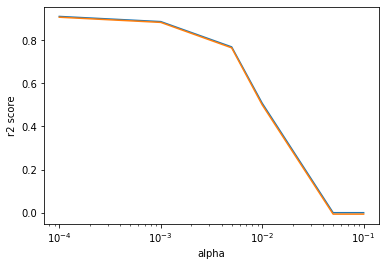

In [104]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [105]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.9065711859708954


In [106]:
lm = Lasso(alpha=0.0001)
lm.fit(X_train2, y_train)

# predict
y_train_pred = lm.predict(X_train2)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test2)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9097930326742827
0.889930196227111


#### Even with the top 20 variables the model is giving good accuracy which is very similar to the model having 40 variables.


In [107]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)

0.001491880233375402
0.001943891630117628


In [108]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train2.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Lasso_data=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
Lasso_data['Coefficient']=abs(Lasso_data['Coefficient'])
Lasso_data[Lasso_data['Coefficient']>0].sort_values(by='Coefficient',ascending=False)


,Variable,Coefficient
1,GrLivArea,0.333
2,OverallQual,0.156
3,LotArea,0.119
4,OverallCond,0.112
5,YearBuilt_Age,0.112
6,GarageCars,0.073
9,Neighborhood_StoneBr,0.053
8,Neighborhood_NoRidge,0.045
10,TotalBsmtSF,0.042
7,KitchenQual,0.041


In [109]:
Lasso_data[Lasso_data['Coefficient']>0].shape
# Total 20 features along with constant

(21, 2)



#### The five most importane variables are 

      
    GrLivArea
    OverallQual
    LotArea 
    YearBuilt_Age
    OverallCond  
   

    -  We have built Ridge and Lasso models which have given similar accuracies but it is preferred to apply Lasso Regression as it resulted in stable and generalised model and moreover performed feature selection.
    
    -  we have built a Lasso Regression model with 20 features with Test Accuracy- 0.8867 which shows that 88.7% variance is explained by the model

### Appendix: Problem Statement - II

##### It is said that the top five variables are not available in the data so, Let's remove top 5 variables and build the model again!

In [110]:
X_train3=X_train.drop(['OverallQual', 'OverallCond', 'GrLivArea', 'YearBuilt_Age', 'LotArea'],axis=1)
X_test3=X_test.drop(['OverallQual', 'OverallCond', 'GrLivArea', 'YearBuilt_Age', 'LotArea'],axis=1)
# X_train and X_test have 70 RFE output predictors which was performed at train-test splitting earlier.

In [111]:
# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.005,0.01,0.05,0.09,0.1]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train3, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.09,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006590,0.001736,0.000997,6.217196e-07,0.0001,{'alpha': 0.0001},0.784643,0.805607,0.788467,0.743837,0.777706,0.780057,0.020298,1,0.806020,0.805106,0.804800,0.818264,0.807196,0.808277,0.005062
1,0.003383,0.000782,0.000798,7.468882e-04,0.001,{'alpha': 0.001},0.750019,0.764338,0.754123,0.701897,0.748095,0.743701,0.021629,2,0.751474,0.757284,0.751421,0.767587,0.755411,0.756635,0.005928
2,0.003789,0.000977,0.001196,3.970634e-04,0.005,{'alpha': 0.005},0.566806,0.615542,0.581588,0.560365,0.621149,0.589068,0.024919,3,0.595201,0.602030,0.593326,0.607850,0.587408,0.597163,0.007094
3,0.002194,0.000399,0.000798,3.990412e-04,0.01,{'alpha': 0.01},0.381192,0.442146,0.389344,0.401744,0.429548,0.408767,0.023384,4,0.418116,0.426794,0.409903,0.431544,0.405099,0.418291,0.009923
4,0.002194,0.000399,0.000598,4.886166e-04,0.05,{'alpha': 0.05},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002194,0.000399,0.000798,3.988982e-04,0.09,{'alpha': 0.09},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.002792,0.000747,0.000998,1.108069e-06,0.1,{'alpha': 0.1},-0.007064,-0.000296,-0.007476,-0.016830,-0.001095,-0.006553,0.005924,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


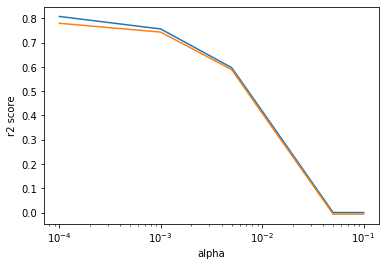

In [113]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [114]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.7800566481876039


In [115]:
lm = Lasso(alpha=0.0001)
lm.fit(X_train3, y_train)

# predict
y_train_pred = lm.predict(X_train3)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test3)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8054212838182542
0.7551319418275806


    The accuracy dropped since the top most important variables are excluded which is relevant 
   

In [116]:
MSE_train = np.mean((y_train_pred - y_train)**2)
print(MSE_train)
MSE_test = np.mean((y_test_pred - y_test)**2)
print(MSE_test)

0.0032180234976633606
0.00432450092985233


In [117]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train3.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

a=pd.DataFrame(list(zip(cols, model_parameters)),columns=['Variable','Coefficient'])
a['Coefficient']=abs(a['Coefficient'])
a[a['Coefficient']>0].sort_values(by='Coefficient',ascending=False).head(10)


,Variable,Coefficient
6,BedroomAbvGr,0.238
9,GarageCars,0.221
4,TotalBsmtSF,0.202
8,KitchenQual,0.169
0,constant,0.163
15,MSZoning_FV,0.126
22,Neighborhood_NoRidge,0.107
17,MSZoning_RL,0.099
29,Exterior1st_BrkComm,0.096
16,MSZoning_RH,0.095


` Now the top 5 variables are BedroomAbvGr, GarageCars, TotalBsmtSF, KitchenQual, MSZoning_FV`